In [1]:
import numpy
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/Users/fepriyadi/Documents/ML/trending_data_test.csv")

df_encoded = df.copy()

missing_values = df.isnull().sum()
missing_values[missing_values>0]

label_encoders = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoder if needed later

# Take first 200 rows
sample_data = df_encoded.head(200).values.tolist()

# Format for API
json_data = {"data": sample_data}

# Save to file (optional)
# with open("/Users/fepriyadi/Documents/ML/sample_request.json", "w") as f:
#     json.dump(json_data, f, indent=2)

# Print JSON
print(json.dumps(json_data, indent=2))

{
  "data": [
    [
      316,
      164,
      200,
      263,
      1,
      0,
      2,
      13797158,
      545476,
      0,
      27112,
      316,
      101
    ],
    [
      56,
      225,
      88,
      33,
      17,
      0,
      28,
      1933259,
      24645,
      0,
      2348,
      56,
      69
    ],
    [
      200,
      55,
      256,
      6,
      1,
      0,
      139,
      1879699,
      4551,
      0,
      744,
      200,
      208
    ],
    [
      207,
      301,
      2,
      203,
      20,
      0,
      234,
      1025003,
      75944,
      0,
      1267,
      207,
      54
    ],
    [
      253,
      10,
      248,
      63,
      2,
      0,
      138,
      713157,
      19978,
      0,
      3187,
      253,
      35
    ],
    [
      293,
      259,
      5,
      252,
      20,
      0,
      132,
      1360804,
      30814,
      0,
      9682,
      293,
      51
    ],
    [
      246,
      71,
      40,
      59,
      20,
      0,
 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'

download_url = f'https://drive.google.com/uc?id={file_id}'

data = pd.read_csv(download_url)

data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


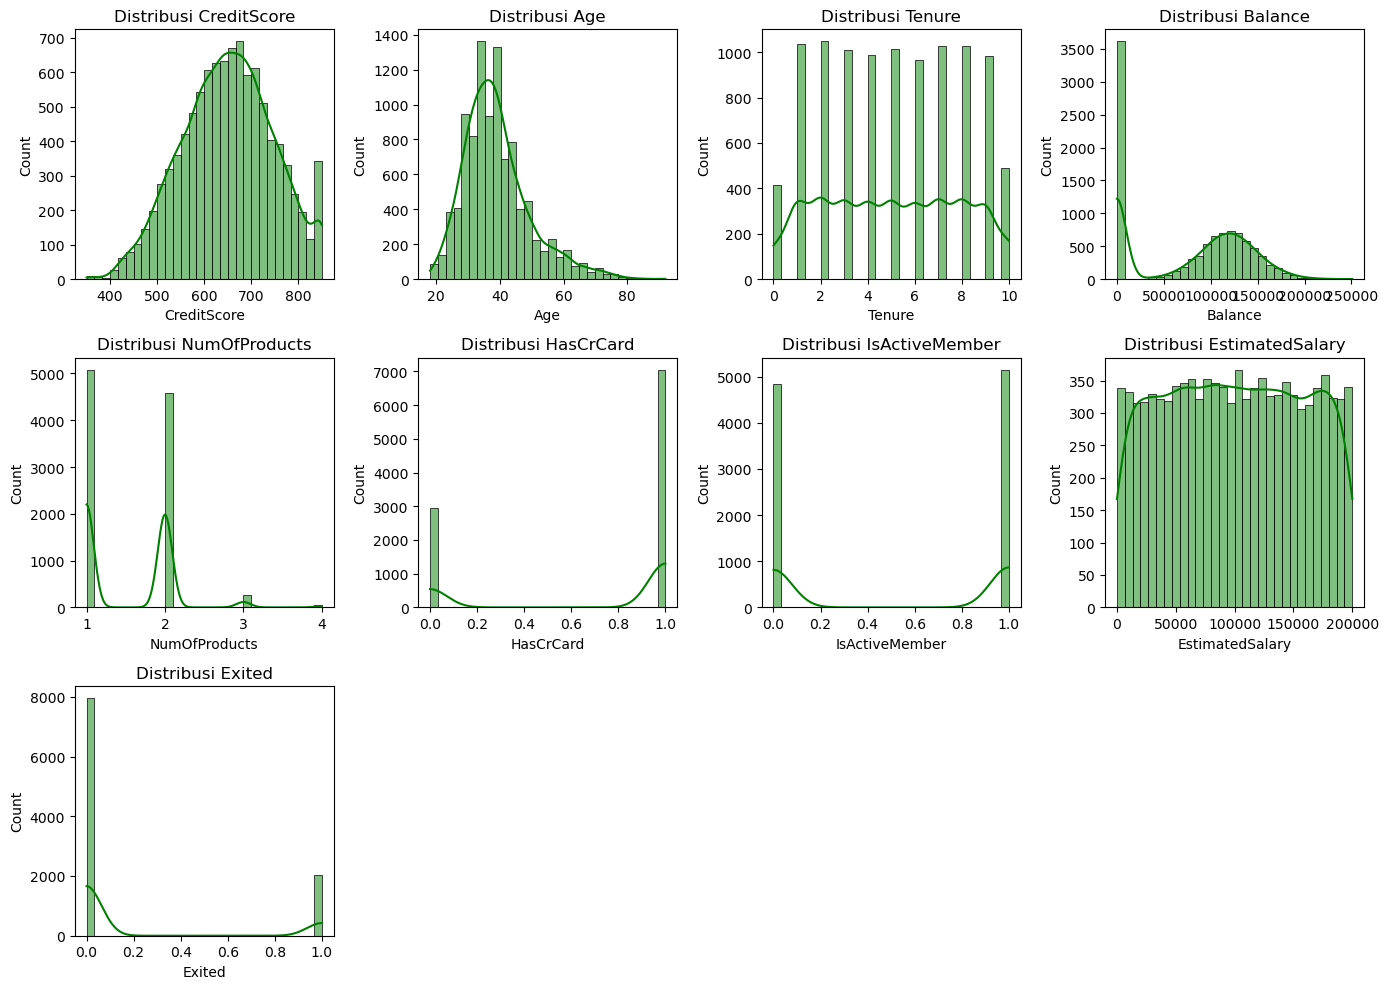

In [3]:
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))

for i, col in enumerate (num_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[col], bins=30, kde=True, color='green')
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()


/var/folders/m7/sjw8yb_1677_b06x0yxyy00m0000gq/T/ipykernel_39835/3616749588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis', legend=False)
/var/folders/m7/sjw8yb_1677_b06x0yxyy00m0000gq/T/ipykernel_39835/3616749588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette='viridis', legend=False)


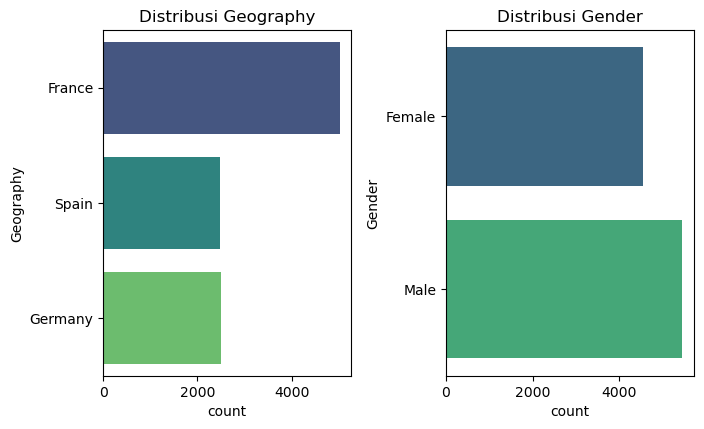

In [4]:
categorical_features = data.select_dtypes(include=[object])

plt.figure(figsize=(14, 8))

for i, col in enumerate(categorical_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[col], palette='viridis', legend=False)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

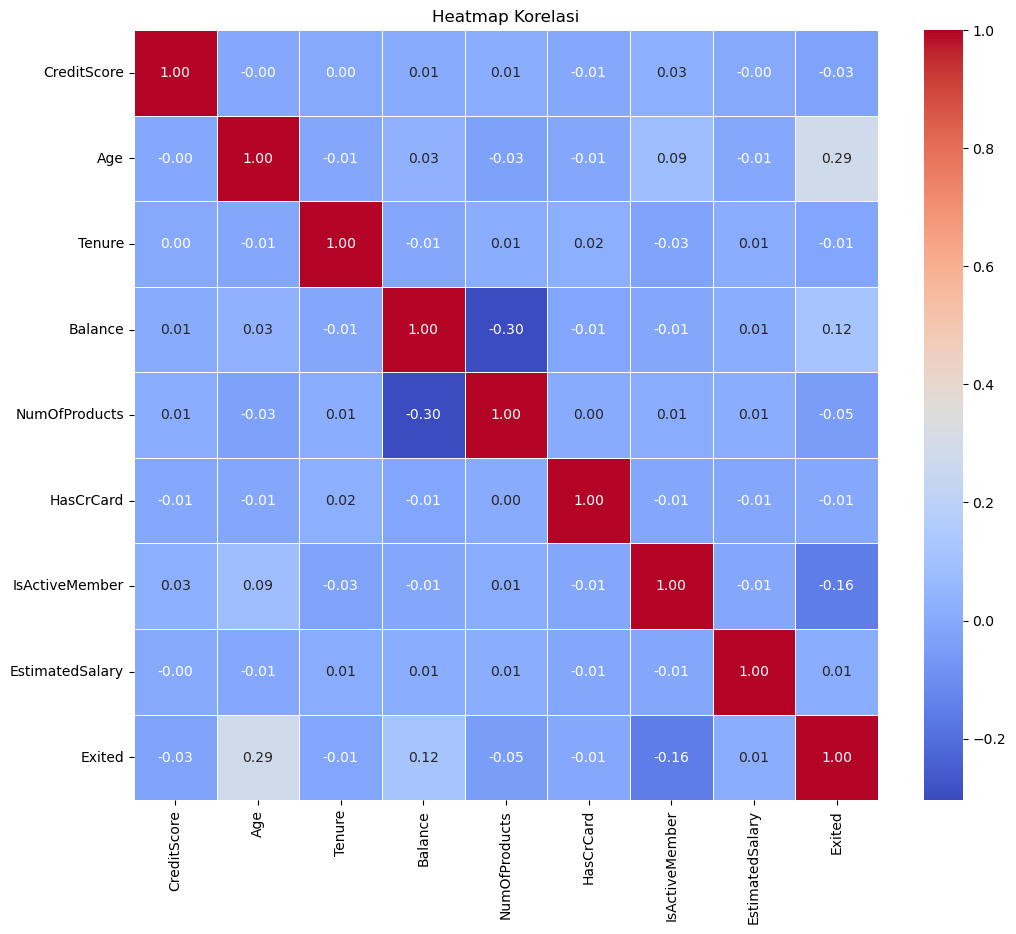

In [5]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix,  annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

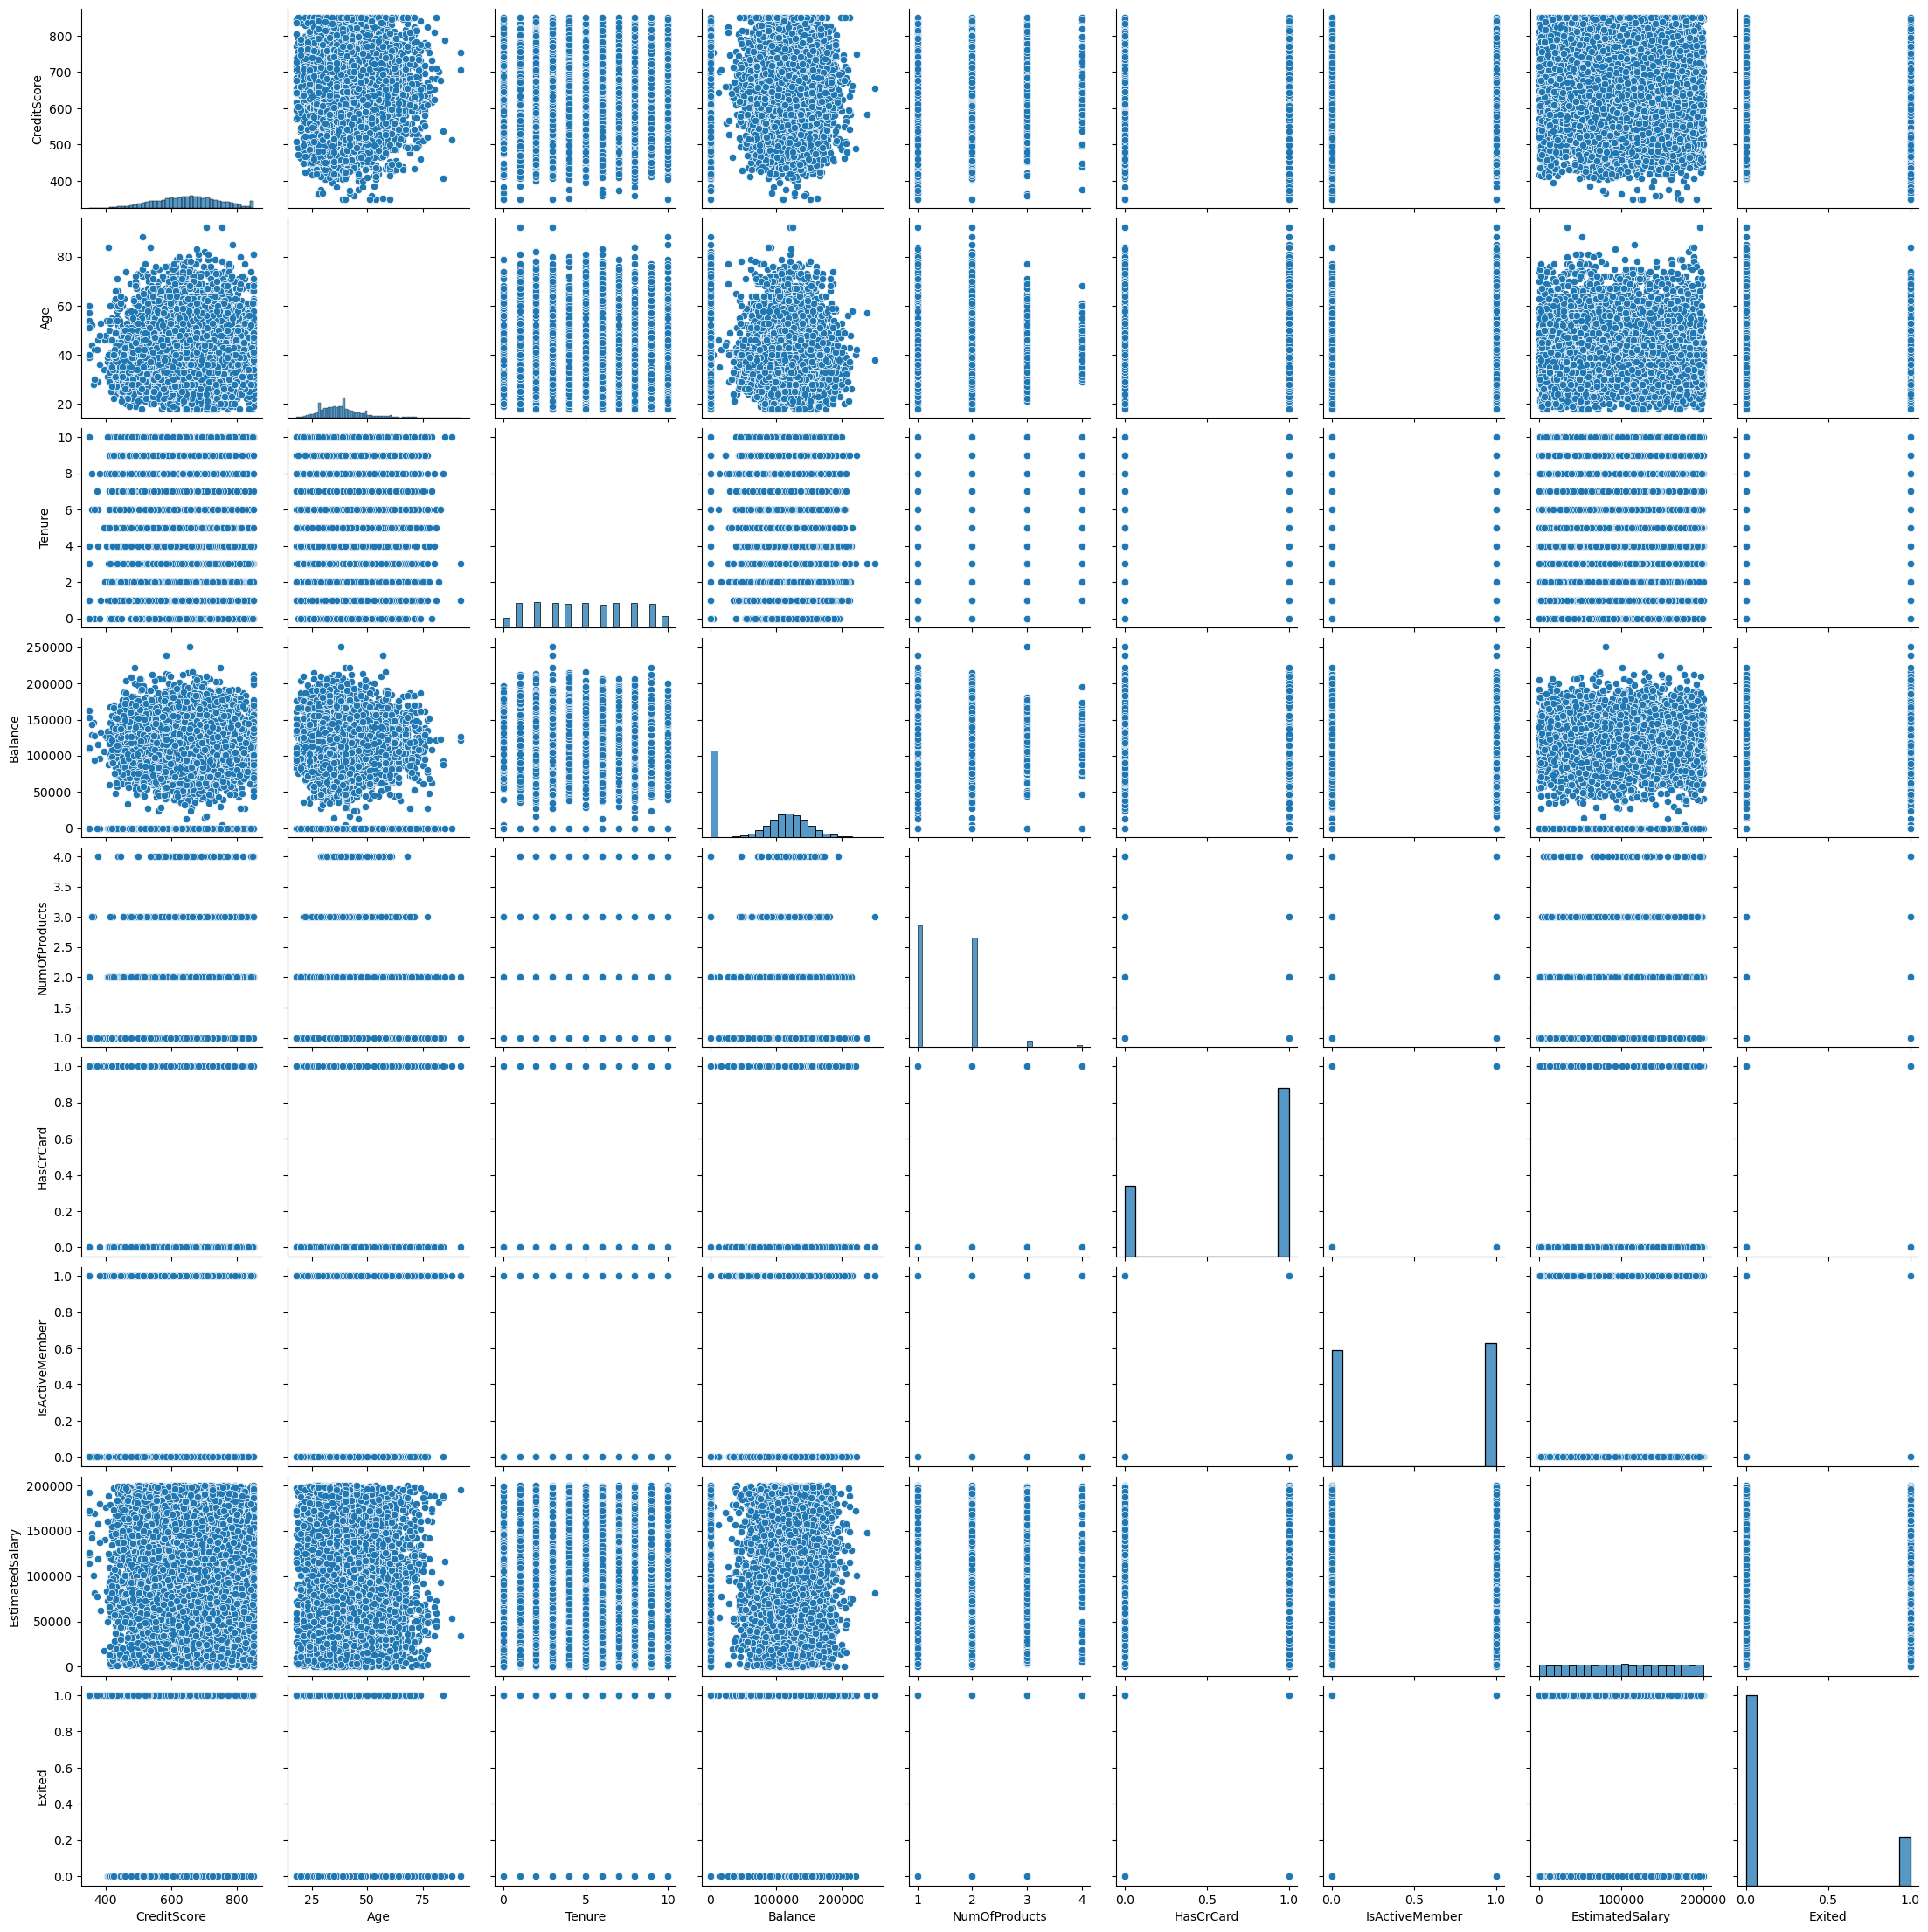

In [6]:
sns.pairplot(num_features)
plt.show()

In [7]:
label_encoder = LabelEncoder()

categorical_columns = ['Geography', 'Gender']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
scaler = MinMaxScaler()

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

X = data.drop(columns=['Exited'])
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 10), y_train=(8000,)
Test set shape: X_test=(2000, 10), y_test=(2000,)


In [9]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training finished")

Model training finished


==== KNN Classifier ====
Confusion Matrix:
[[1520   87]
 [ 265  128]]
True Positive (TP): 128
False Positive (FP): 87
False Negative (FN): 265
True Negative (TN): 1520
Accuracy: 0.8240
Precision: 0.5953
Recall: 0.3257
F1-Score: 0.4211

----------------------------------------



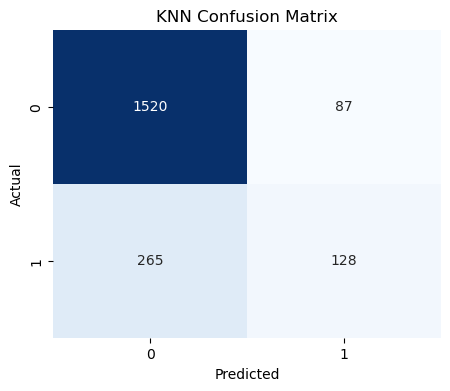

In [10]:
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    results = {
        'Confusion Matrix': cm,
        'True Positive': tp,
        'False Positive': fp,
        'False Negative': fn,
        'True Negative': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

    return results

results = {
    'K-Nearest Neighbors': evaluate_model(knn, X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test),
    'Random Forest': evaluate_model(rf, X_test, y_test),
    'Support Vector': evaluate_model(svm, X_test, y_test),
    'Naive Bayes': evaluate_model(nb, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []

for model_name, metrics in results.items():
    rows.append({
        'Model' : model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)


print(summary_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors    0.8240   0.595349  0.325700  0.421053
1        Decision Tree    0.7835   0.454128  0.503817  0.477684
2        Random Forest    0.8695   0.782051  0.465649  0.583732
3       Support Vector    0.8530   0.827815  0.318066  0.459559
4          Naive Bayes    0.8285   0.681159  0.239186  0.354049


In [ ]:
df_inverse = df_encoded.copy()
df_inverse[num_cols] = std_scaler.inverse_transform(df_encoded[num_cols])
df_inverse['Cluster'] = kmeans_labels

X_inverse = df_inverse.iloc[:, [x_idx, y_idx, 12]].values

age_range_map = {
    'Teen': '18–25',
    'Young Adult': '26–35',
    'Adult': '36–45',
    'Middle Age': '46–55',
    'Older Adult': '56–100'
}

max_spending = X_inverse[:, 1].max()

percentiles = np.linspace(0, 1, k + 1)  # e.g. for k=3 → [0. , 0.33, 0.66, 1.0]
thresholds = df_inverse['TransactionAmount'].quantile(percentiles).values

# Define labels dynamically
spending_levels = []
if k == 3:
    spending_levels = ['💸 Small', '💵 Medium', '💰 Large']
elif k == 4:
    spending_levels = ['💸 Small', '💵 Medium', '💰 High', '💎 Huge']
else:
    # Automatically generate generic labels if k > 4
    base_labels = ['Very Small', 'Small', 'Medium', 'High', 'Huge', 'Ultra', 'Elite']
    spending_levels = base_labels[:k]

cluster_analysis = {
    0 : 'Cluster ini mencakup pelanggan dengan usia Dewasa dan tingkat pengeluaran yang tinggi.\n '
    'Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.\n '
    'Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi',
    1 : 'Cluster ini mencakup pelanggan dengan usia Usia lanjut dan tingkat pengeluaran yang rendah. \n '
    'Pelanggan dalam cluster ini cenderung memiliki daya beli yang rendah dan mereka lebih cenderung untuk tidak membelajakan pendapatan mereka. \n'
    'Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang rendah resiko',
    2 : 'Cluster ini mencakup pelanggan dengan usia Remaja dan tingkat pengeluaran yang tinggi.\n'
    'Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. \n'
    'Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi'
}

for cluster_id in range(k):
    # cluster_data = df_inverse[df_inverse['Cluster'] == cluster_id]
    cluster_data = X_inverse[kmeans_labels == cluster_id]
    mean_age = cluster_data[:, 0].mean()
    mean_spending = cluster_data[:, 1].mean()
    age_group = pd.cut([mean_age], bins=bins, labels=age_labels, right=False)[0]
    age_range = age_range_map.get(age_group, "Unknown")     
    spending_level = pd.cut([mean_spending], bins=thresholds, labels=spending_levels, include_lowest=True)[0]

    print(f"Cluster {cluster_id+1}: (Nasabah dengan rata-rata usia {age_group}({age_range}) memiliki {spending_level} Spending level ")
    print(f"Rata-rata Umur: {mean_age:.2f} ({age_group})")
    print(f"Rata-rata Spending Amount(k$): {mean_spending:.2f}")
    print(f"Analisis: {cluster_analysis[cluster_id]}\n")